In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from matplotlib.colors import ListedColormap

In [ ]:
df = pd.read_csv('/content/autos.csv')

In [ ]:
df

,symboling,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9,111,5000,21,27,13495
1,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9,111,5000,21,27,16500
2,1,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9,154,5000,19,26,16500
3,2,audi,gas,std,4,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10,102,5500,24,30,13950
4,2,audi,gas,std,4,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,-1,volvo,gas,std,4,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9,114,5400,23,28,16845
189,-1,volvo,gas,turbo,4,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,8,160,5300,19,25,19045
190,-1,volvo,gas,std,4,sedan,rwd,front,109.1,188.8,...,173,mpfi,3.58,2.87,8,134,5500,18,23,21485
191,-1,volvo,diesel,turbo,4,sedan,rwd,front,109.1,188.8,...,145,idi,3.01,3.40,23,106,4800,26,27,22470


In [ ]:
features = ["highway_mpg", "engine_size", "horsepower", "curb_weight"]

X = df.copy()
y = X.pop('price')
X = X.loc[:, features]

# Standardize
X_scaled = (X - X.mean(axis=0)) / X.std(axis=0)

In [ ]:
from sklearn.decomposition import PCA

# Create principal components
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Convert to dataframe
component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns=component_names)

X_pca.head()

,PC1,PC2,PC3,PC4
0,0.382486,-0.400222,0.124122,0.169539
1,0.382486,-0.400222,0.124122,0.169539
2,1.550890,-0.107175,0.598361,-0.256081
3,-0.408859,-0.425947,0.243335,0.013920
4,1.132749,-0.814565,-0.202885,0.224138


In [ ]:
loadings = pd.DataFrame(
    pca.components_.T,  # transpose the matrix of loadings
    columns=component_names,  # so the columns are the principal components
    index=X.columns,  # and the rows are the original features
)
loadings

,PC1,PC2,PC3,PC4
highway_mpg,-0.492347,0.770892,0.070142,-0.397996
engine_size,0.503859,0.626709,0.019960,0.594107
horsepower,0.500448,0.013788,0.731093,-0.463534
curb_weight,0.503262,0.113008,-0.678369,-0.523232


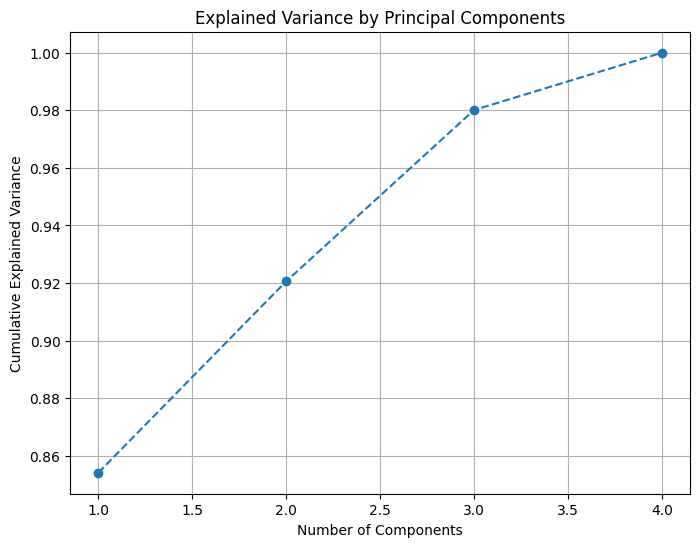

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_variance(pca):
    """
    Plots the explained variance ratio of each principal component.

    Args:
        pca: A fitted PCA object.
    """

    fig, ax = plt.subplots(figsize=(8, 6))

    # Plot the cumulative explained variance
    ax.plot(range(1, len(pca.explained_variance_ratio_) + 1),
            pca.explained_variance_ratio_.cumsum(),
            marker='o', linestyle='--')

    # Add labels and title
    ax.set_xlabel('Number of Components')
    ax.set_ylabel('Cumulative Explained Variance')
    ax.set_title('Explained Variance by Principal Components')

    # Show grid
    ax.grid(True)

    plt.show()

# Look at explained variance
plot_variance(pca);

In [ ]:
mi_scores = make_mi_scores(X_pca, y, discrete_features=False)
mi_scores

NameError: name 'make_mi_scores' is not defined

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display
from sklearn.feature_selection import mutual_info_regression


plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)


def plot_variance(pca, width=8, dpi=100):
    # Create figure
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)
    # Explained variance
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(
        xlabel="Component", title="% Explained Variance", ylim=(0.0, 1.0)
    )
    # Cumulative Variance
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    axs[1].set(
        xlabel="Component", title="% Cumulative Variance", ylim=(0.0, 1.0)
    )
    # Set up figure
    fig.set(figwidth=8, dpi=100)
    return axs

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores


df = pd.read_csv("/content/autos.csv")
df.head()

<ipython-input-44-01312441029b>:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.


,symboling,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9,111,5000,21,27,13495
1,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9,111,5000,21,27,16500
2,1,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9,154,5000,19,26,16500
3,2,audi,gas,std,4,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10,102,5500,24,30,13950
4,2,audi,gas,std,4,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8,115,5500,18,22,17450


In [ ]:
df

,symboling,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9,111,5000,21,27,13495
1,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9,111,5000,21,27,16500
2,1,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9,154,5000,19,26,16500
3,2,audi,gas,std,4,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10,102,5500,24,30,13950
4,2,audi,gas,std,4,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,-1,volvo,gas,std,4,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9,114,5400,23,28,16845
189,-1,volvo,gas,turbo,4,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,8,160,5300,19,25,19045
190,-1,volvo,gas,std,4,sedan,rwd,front,109.1,188.8,...,173,mpfi,3.58,2.87,8,134,5500,18,23,21485
191,-1,volvo,diesel,turbo,4,sedan,rwd,front,109.1,188.8,...,145,idi,3.01,3.40,23,106,4800,26,27,22470


In [ ]:
features = ["highway_mpg", "engine_size", "horsepower", "curb_weight"]

X = df.copy()
y = X.pop('price')
X = X.loc[:, features]

# Standardize
X_scaled = (X - X.mean(axis=0)) / X.std(axis=0)

In [ ]:
from sklearn.decomposition import PCA

# Create principal components
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Convert to dataframe
component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns=component_names)

X_pca.head()

,PC1,PC2,PC3,PC4
0,0.382486,-0.400222,0.124122,0.169539
1,0.382486,-0.400222,0.124122,0.169539
2,1.550890,-0.107175,0.598361,-0.256081
3,-0.408859,-0.425947,0.243335,0.013920
4,1.132749,-0.814565,-0.202885,0.224138


from matplotlib import pyplot as plt
_df_0['PC1'].plot(kind='hist', bins=20, title='PC1')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['PC2'].plot(kind='hist', bins=20, title='PC2')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['PC3'].plot(kind='hist', bins=20, title='PC3')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['PC4'].plot(kind='hist', bins=20, title='PC4')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='PC1', y='PC2', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='PC2', y='PC3', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='PC3', y='PC4', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7['PC1'].plot(kind='line', figsize=(8, 4), title='PC1')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_8['PC2'].plot(kind='line', figsize=(8, 4), title='PC2')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['PC3'].plot(kind='line', figsize=(8, 4), title='PC3')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['PC4'].plot(kind='line', figsize=(8, 4), title='PC4')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
loadings = pd.DataFrame(
    pca.components_.T,  # transpose the matrix of loadings
    columns=component_names,  # so the columns are the principal components
    index=X.columns,  # and the rows are the original features
)
loadings

,PC1,PC2,PC3,PC4
highway_mpg,-0.492347,0.770892,0.070142,-0.397996
engine_size,0.503859,0.626709,0.019960,0.594107
horsepower,0.500448,0.013788,0.731093,-0.463534
curb_weight,0.503262,0.113008,-0.678369,-0.523232


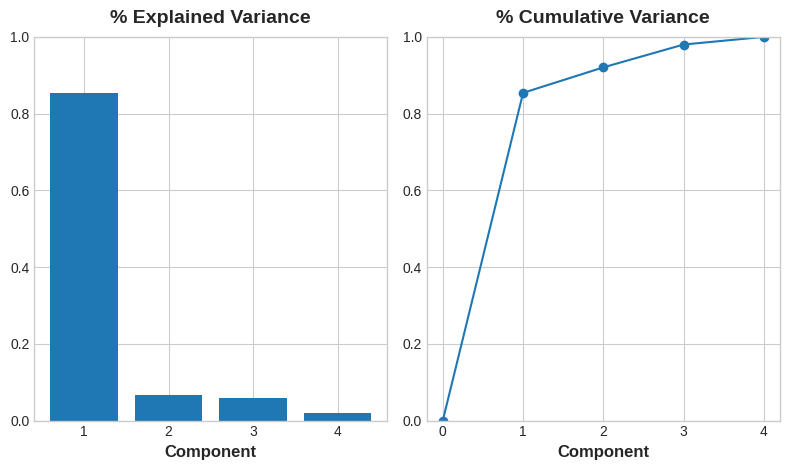

In [ ]:
plot_variance(pca);

In [ ]:
mi_scores = make_mi_scores(X_pca, y, discrete_features=False)
mi_scores

,MI Scores
PC1,1.012697
PC2,0.379407
PC3,0.306641
PC4,0.205228


In [ ]:
idx = X_pca["PC3"].sort_values(ascending=False).index
cols = ["make", "body_style", "horsepower", "curb_weight"]
df.loc[idx, cols]


,make,body_style,horsepower,curb_weight
118,porsche,hardtop,207,2756
117,porsche,hardtop,207,2756
119,porsche,convertible,207,2800
45,jaguar,sedan,262,3950
96,nissan,hatchback,200,3139
...,...,...,...,...
59,mercedes-benz,wagon,123,3750
61,mercedes-benz,sedan,123,3770
101,peugot,wagon,95,3430
105,peugot,wagon,95,3485


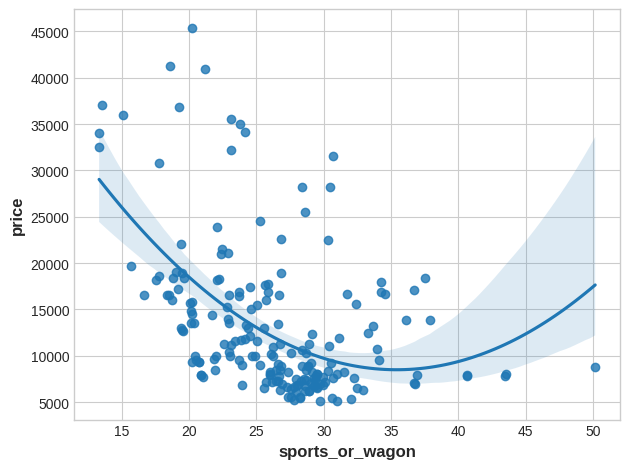

In [ ]:
df["sports_or_wagon"] = X.curb_weight / X.horsepower
sns.regplot(x="sports_or_wagon", y='price', data=df, order=2);

In [ ]:
X_scaled

,highway_mpg,engine_size,horsepower,curb_weight
0,-0.555613,0.045098,0.198054,-0.025646
1,-0.555613,0.045098,0.198054,-0.025646
2,-0.702307,0.574066,1.330822,0.496473
3,-0.115531,-0.459826,-0.039037,-0.426254
4,-1.289083,0.189362,0.303427,0.498371
...,...,...,...,...
188,-0.408919,0.309582,0.277084,0.741394
189,-0.849001,0.309582,1.488882,0.925560
190,-1.142389,1.078989,0.803953,0.855311
191,-0.555613,0.405758,0.066336,1.244527


In [ ]:
from sklearn.cluster import KMeans

In [ ]:
km = KMeans(
    n_clusters = 3,
    n_init=1
)

km

KMeans(n_clusters=3, n_init=1)

In [ ]:
p = X_scaled.loc[:,["highway_mpg", "engine_size", "horsepower", "curb_weight"]].values
p


array([[-5.55613144e-01,  4.50980351e-02,  1.98053570e-01,
        -2.56460439e-02],
       [-5.55613144e-01,  4.50980351e-02,  1.98053570e-01,
        -2.56460439e-02],
       [-7.02307175e-01,  5.74065596e-01,  1.33082172e+00,
         4.96472783e-01],
       [-1.15531050e-01, -4.59825546e-01, -3.90374370e-02,
        -4.26253580e-01],
       [-1.28908330e+00,  1.89361915e-01,  3.03427351e-01,
         4.98371397e-01],
       [-8.49001206e-01,  1.89361915e-01,  1.71710125e-01,
        -1.03489215e-01],
       [-8.49001206e-01,  1.89361915e-01,  1.71710125e-01,
         5.36343675e-01],
       [-8.49001206e-01,  1.89361915e-01,  1.71710125e-01,
         7.45191206e-01],
       [-1.58247136e+00,  6.91420151e-02,  9.62013483e-01,
         9.95808243e-01],
       [-2.62225082e-01, -4.83869526e-01, -6.53808823e-02,
        -3.16133973e-01],
       [-2.62225082e-01, -4.83869526e-01, -6.53808823e-02,
        -3.16133973e-01],
       [-4.08919113e-01,  8.62593356e-01,  4.61488023e-01,
      

In [ ]:
clusters = km.fit(p)

In [ ]:
from plotnine import *

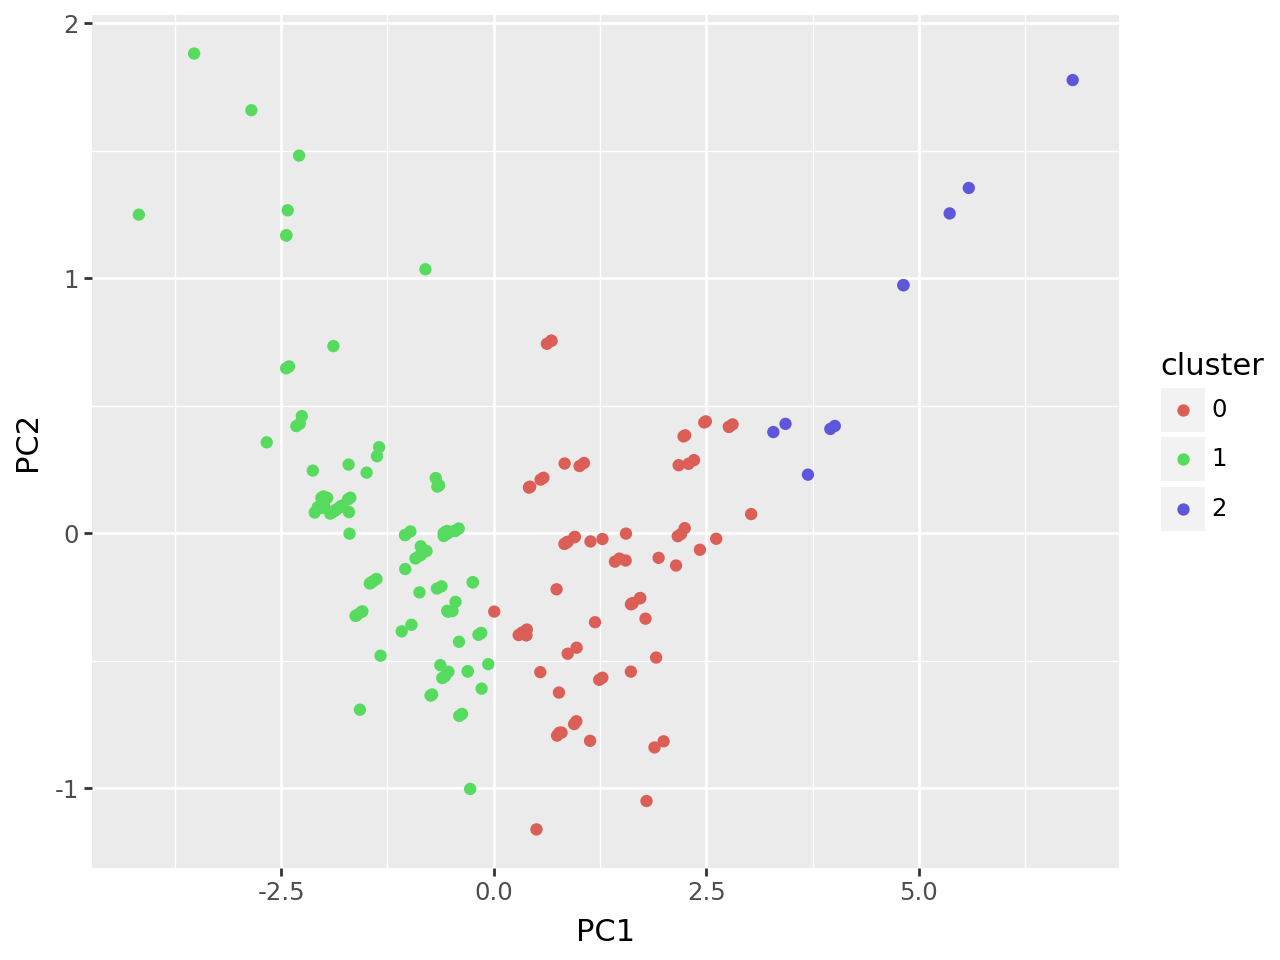

In [ ]:
X_pca['cluster'] = pd.Series(clusters.labels_).astype('str')

(
    ggplot(X_pca, aes("PC1", "PC2", color="cluster")) +
    geom_point()
)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a model before PCA
model_before_pca = LinearRegression()
model_before_pca.fit(X_train, y_train)
y_pred_before_pca = model_before_pca.predict(X_test)

# Calculate accuracy (using mean squared error)
mse_before_pca = mean_squared_error(y_test, y_pred_before_pca)
print(f'MSE before PCA: {mse_before_pca}')

# Fit a model after PCA
X_train_pca, X_test_pca = train_test_split(X_pca, test_size=0.2, random_state=42)
model_after_pca = LinearRegression()
model_after_pca.fit(X_train_pca, y_train)
y_pred_after_pca = model_after_pca.predict(X_test_pca)

# Calculate accuracy after PCA
mse_after_pca = mean_squared_error(y_test, y_pred_after_pca)
print(f'MSE after PCA: {mse_after_pca}')


MSE before PCA: 20373652.44865021
MSE after PCA: 18318095.045152526


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.decomposition import PCA

# Load the dataset
df = pd.read_csv("/content/autos.csv")

# Feature selection
features = ["highway_mpg", "engine_size", "horsepower", "curb_weight"]
X = df[features]
y = df['price']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a model before PCA
model_before_pca = LinearRegression()
model_before_pca.fit(X_train, y_train)
y_pred_before_pca = model_before_pca.predict(X_test)

# Calculate R² score before PCA
r2_before_pca = r2_score(y_test, y_pred_before_pca)
print(f'R² score before PCA: {r2_before_pca:.4f}')

# Standardization
X_scaled = (X - X.mean(axis=0)) / X.std(axis=0)

# PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Split PCA transformed data into training and test sets
X_train_pca, X_test_pca = train_test_split(X_pca, test_size=0.2, random_state=42)

# Fit a model after PCA
model_after_pca = LinearRegression()
model_after_pca.fit(X_train_pca, y_train)
y_pred_after_pca = model_after_pca.predict(X_test_pca)

# Calculate R² score after PCA
r2_after_pca = r2_score(y_test, y_pred_after_pca)
print(f'R² score after PCA: {r2_after_pca:.4f}')


R² score before PCA: 0.8187
R² score after PCA: 0.8187


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the dataset
df = pd.read_csv("/content/autos.csv")

# Example target variable (binarized for demonstration)
threshold = df['price'].median()
df['price_above_median'] = (df['price'] > threshold).astype(int)

# Feature selection
features = ["highway_mpg", "engine_size", "horsepower", "curb_weight"]
X = df[features]
y = df['price_above_median']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit a classification model before PCA
model_before_pca = LogisticRegression()
model_before_pca.fit(X_train_scaled, y_train)
y_pred_before_pca = model_before_pca.predict(X_test_scaled)

# Calculate accuracy before PCA
accuracy_before_pca = accuracy_score(y_test, y_pred_before_pca)
print(f'Accuracy before PCA: {accuracy_before_pca:.4f}')

# Apply PCA
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Fit a classification model after PCA
model_after_pca = LogisticRegression()
model_after_pca.fit(X_train_pca, y_train)
y_pred_after_pca = model_after_pca.predict(X_test_pca)

# Calculate accuracy after PCA
accuracy_after_pca = accuracy_score(y_test, y_pred_after_pca)
print(f'Accuracy after PCA: {accuracy_after_pca:.4f}')


Accuracy before PCA: 0.8974
Accuracy after PCA: 0.8974
